## Recommendation system for e-commerce businesses

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
amazon_ratings = pd.read_csv(r'D:\MCA\Sem4\Minor Project II\LATEST\Python-Ecommerce-recommendation-system-using-machine-learning-master\Python-Ecommerce-recommendation-system-using-machine-learning-master\ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()  #removing null values (data cleaning)
amazon_ratings.head() 

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
amazon_ratings.shape  #dimension

(2023070, 4)

In [4]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count()) #grouped ratings of each product and then count it(since 1 product can have many ratings) so it gives number of ratings a product got
most_popular = popular_products.sort_values('Rating', ascending=False) #sort in descending and store in new dataset
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


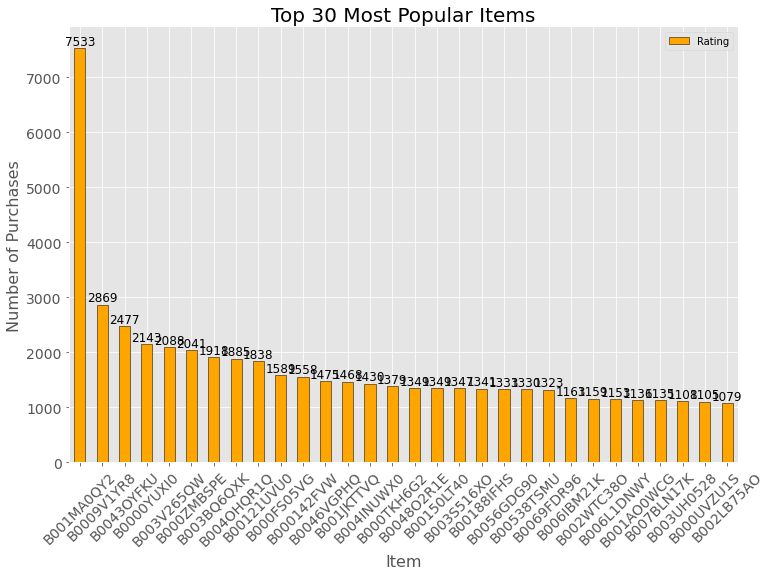

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar plot of the top 30 items
ax = most_popular.head(30).plot(kind='bar', color='orange', edgecolor='black', figsize=(12,8))

# Set plot properties
ax.set_title('Top 30 Most Popular Items', fontsize=20)
ax.set_xlabel('Item', fontsize=16)
ax.set_ylabel('Number of Purchases', fontsize=16)
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.tick_params(axis='y', labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

plt.show()

In [6]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000) #dataset was huge, so we created another having only first 10000 data

In [7]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)  #creates a table having proudct ids as columns 
ratings_utility_matrix.head()  #so it forms a matrix with product id and user id as col and row, and if a user has rated a product then the corresponding elementwill be  equal to that rating, 
#but we have initialized with all 0

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ratings_utility_matrix.shape

(9697, 886)

In [9]:
X = ratings_utility_matrix.T #transposed the matrix
X.head()


UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X.shape  #until this we did data cleaning

(886, 9697)

In [11]:
print(X)

UserId      A00205921JHJK5X9LNP42  A024581134CV80ZBLIZTZ  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0                      0   
0733001998                      0                      0   
0737104473                      0                      0   
0762451459                      0                      0   
...                           ...                    ...   
B000052YPU                      0                      0   
B000052YPV                      0                      0   
B000052YPY                      0                      0   
B000052YQ0                      0                      0   
B000052YQ2                      0                      0   

UserId      A03056581JJIOL5FSKJY7  A03099101ZRK4K607JVHH  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0      

In [12]:
X1 = X

In [13]:
SVD = TruncatedSVD(n_components=10)  #SVD: singular value decomposition
decomposed_matrix = SVD.fit_transform(X)  #keeping only worthy information out of the huge dataset that we have, it is known as feature extraction
decomposed_matrix.shape

(886, 10)

In [14]:
correlation_matrix = np.corrcoef(decomposed_matrix)  #the decomposed matrix is now converted to correlation matrix
#i.e. how each product is related to each user (row to col)
correlation_matrix.shape   #decomposed matrix is passed to reduce time and space complexity

(886, 886)

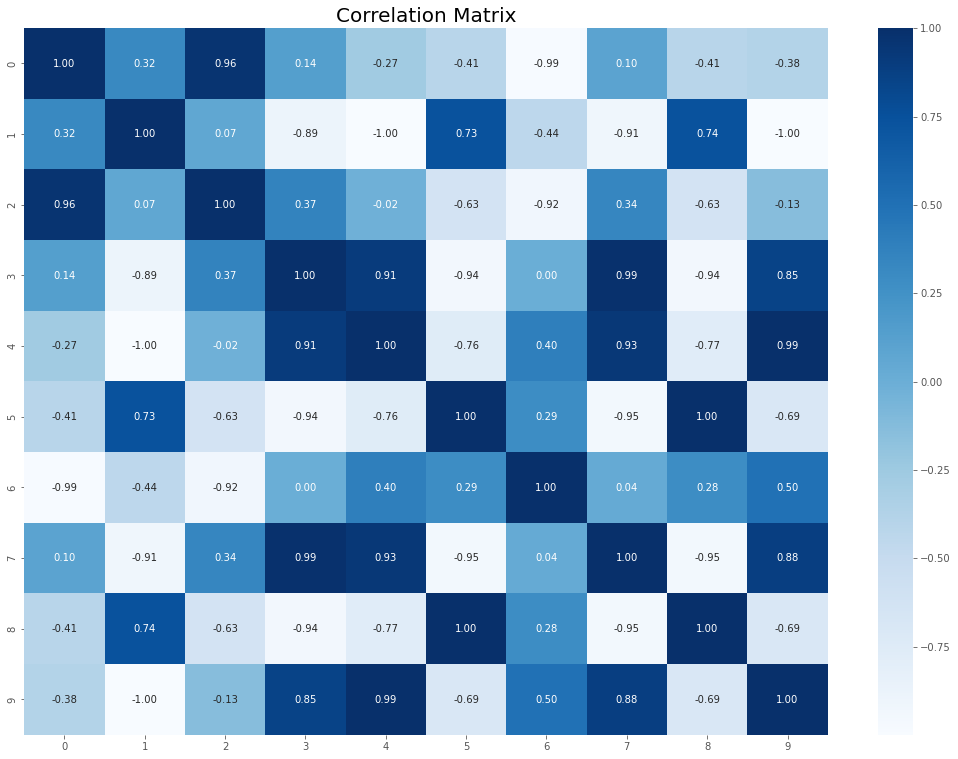

In [15]:
#Visualization the correlation matrix
import seaborn as sns
new_dataframe=pd.DataFrame(correlation_matrix)
new_dataframe=new_dataframe.iloc[:10,:10]
fig,ax = plt.subplots(figsize=[18,13])
sns.heatmap(new_dataframe.corr(),annot=True,fmt=".2f",ax=ax,cmap="Blues")
ax.set_title("Correlation Matrix",fontsize=20)
plt.show()

In [16]:
X.index[99]  #Isolating Product ID # 6117036094 from the Correlation Matrix
#Assuming the customer buys Product ID # 6117036094 (randomly chosen)

'6117036094'

In [17]:
i = "6117036094"

product_names = list(X.index)  #indexes of x has product ID, so we form its list with the name of product_names
product_ID = product_names.index(i)
product_ID  #we did reverse of above block

99

In [18]:
correlation_product_ID = correlation_matrix[product_ID] #extracted row 99 and hence correlation of it with all other products
correlation_product_ID.shape  

(886,)

In [19]:
Recommend = list(X.index[correlation_product_ID > 0.90])  #made a list of products having correlation > 0.9

Recommend.remove(i) # Removes the item already bought by the customer, because is related to itself with value 1

Recommend[0:9] # Recommending top 10 highly correlated products in sequence

['0762451459',
 '130414089X',
 '1304146537',
 '1304168522',
 '1304488608',
 '1304511073',
 '1304511081',
 '130451112X',
 '1304511138']

# KNN Model 

In [20]:
ratings_utility_matrix

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

user_item_matrix = ratings_utility_matrix
# Create a NearestNeighbors model and fit it to the user-item matrix
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(user_item_matrix)

# Choose a random user to recommend products for
user_index = 50 #(let)

# Find the k nearest neighbors to the selected user
distances, indices = model.kneighbors(user_item_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=6)

# Print the recommended products
print('Recommended products for user', user_index)
for i in range(1, len(indices.flatten())):
    print('{0}: {1}'.format(i, user_item_matrix.index[indices.flatten()[i]]))

Recommended products for user 50
1: A1STI3LKR1997Z
2: A36XLW55CRL2C0
3: A2VMXOLHVQXU33
4: A3TYR1ALBZ2EU9
5: AYD8J958LU3V3


# K-means algorithm

In [22]:
# Importing libraries for kmeans

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [23]:
product_descriptions = pd.read_csv(r'D:\MCA\Sem4\Minor Project II\LATEST\Python-Ecommerce-recommendation-system-using-machine-learning-master\Python-Ecommerce-recommendation-system-using-machine-learning-master\product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [24]:
# Missing values | Data Cleaning

product_descriptions = product_descriptions.dropna()
product_descriptions.shape

(124428, 2)

In [25]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [26]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10) #Data Cleaning

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [27]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"]) #feature extraction
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

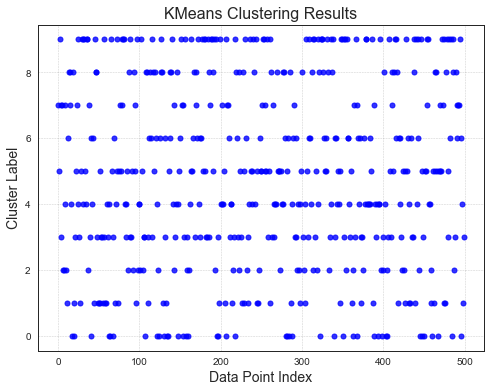

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=10, init='k-means++')
y_kmeans = kmeans.fit_predict(X1)

# Customize plot properties
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y_kmeans, '.', markersize=10, color='blue', alpha=0.8)
ax.set_title('KMeans Clustering Results', fontsize=16)
ax.set_xlabel('Data Point Index', fontsize=14)
ax.set_ylabel('Cluster Label', fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

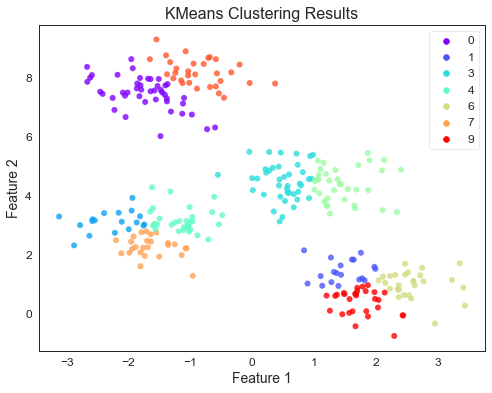

In [55]:
import seaborn as sns
from sklearn.datasets import make_blobs

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=10, random_state=0)
prediction = kmeans.fit_predict(X)

# Customize plot properties

sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=prediction, palette='rainbow', alpha=0.8, edgecolor='none')
plt.title('KMeans Clustering Results', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
#if any errors run the last cell first

In [32]:
# # Optimal clusters is 
# Top words in each cluster based on product description
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 galvanized
 azek
 nails
 treated
 post
 nailer
 outdoor
 nail
 round
 dipped
Cluster 1:
 air
 cooling
 insulation
 power
 cooking
 ft
 control
 cycle
 room
 heater
Cluster 2:
 watering
 plants
 heavy
 easy
 duty
 rug
 vary
 water
 lbs
 construction
Cluster 3:
 light
 watt
 ft
 design
 use
 led
 installation
 offers
 high
 easy
Cluster 4:
 metal
 pre
 steel
 sink
 20
 drill
 gal
 gauge
 capacity
 42
Cluster 5:
 water
 use
 brass
 valve
 ball
 handle
 spray
 gas
 air
 easy
Cluster 6:
 window
 frame
 patio
 cover
 aluminum
 screen
 fabric
 outdoor
 dining
 cushions
Cluster 7:
 cutting
 saw
 tool
 blade
 amp
 pole
 compact
 m12
 ft
 power
Cluster 8:
 wood
 door
 painted
 65
 proposition
 nbsp
 residents
 california
 primed
 home
Cluster 9:
 wall
 panels
 sheet
 wood
 easy
 home
 laminate
 speaker
 plate
 ft


In [33]:
print("Cluster ID:")
Y = vectorizer.transform(["cutting tool"])
prediction = model.predict(Y)
print(prediction)
print(Y)

Cluster ID:
[7]
  (0, 8095)	0.6781178768872128
  (0, 2207)	0.7349531584026148


In [34]:
print("Cluster ID:")
Y = vectorizer.transform(["spray paint"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


In [35]:
print("Cluster ID:")
Y = vectorizer.transform(["steel drill"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[4]


In [36]:
print("Cluster ID:")
Y = vectorizer.transform(["water"])
prediction = model.predict(Y)
print(prediction)

#Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

Cluster ID:
[5]


In [37]:
# train,test=train_test_split(X,test_size=0.4)

In [38]:
from sklearn.cluster import KMeans

model2=KMeans(n_clusters=10)
model2.fit(X)  #X contains already cleaned data (done while fitting k-means)
prediction3=model2.fit_predict(X)

In [39]:
from sklearn.metrics import silhouette_score

silhouette_score(X,labels=prediction3)  #Silhoutte_score for kmeans

0.6176242475418857

# Specteral Clustering Algorithm

In [40]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [41]:
sc=SpectralClustering(affinity='rbf',n_clusters=5)

In [42]:
prediction=sc.fit(X)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [43]:
prediction=sc.fit_predict(X)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [44]:
silhouette_score(X,labels=prediction)

0.5006278634316556

In [45]:
Y = vectorizer.transform(["spray paint","water","cutting tool","concrete","steel drill"])
type(Y)

scipy.sparse.csr.csr_matrix

In [46]:
sc.fit_predict(Y)

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


array([2, 0, 3, 4, 1])

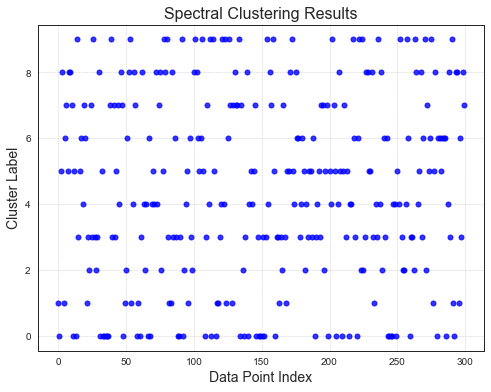

In [53]:
# Customize plot properties
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(prediction, '.', markersize=10, color='blue', alpha=0.8)
ax.set_title('Spectral Clustering Results', fontsize=16)
ax.set_xlabel('Data Point Index', fontsize=14)
ax.set_ylabel('Cluster Label', fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()
plt.show()

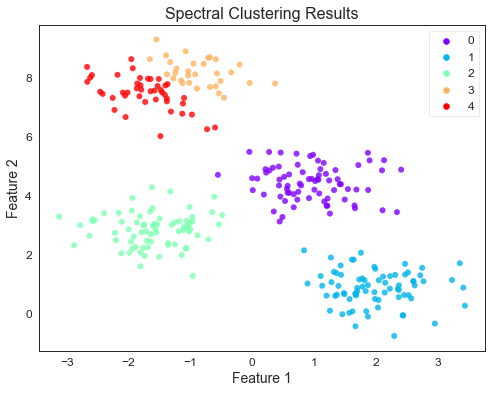

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Initialize and fit SpectralClustering model
sc = SpectralClustering(affinity='rbf', n_clusters=5, random_state=0)
prediction = sc.fit_predict(X)

# Create scatter plot of the predicted clusters
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=prediction, palette='rainbow', edgecolor='none', alpha=0.8)
plt.title('Spectral Clustering Results', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()